In [1]:
using DataFrames
using Queryverse
using VegaLite
using VegaDatasets

# Composite Graphs (Error Bands, Box Plots etc.)

In [2]:
# Bring in Cars data set
cars  = dataset("cars") |> 
@select(:Name, :Year, :Origin, :Miles_per_Gallon, :Horsepower) |>
DataFrame;

first(cars, 4) 

,Name,Year,Origin,Miles_per_Gallon,Horsepower
,String,String,String,Float64⍰,Int64⍰
1,chevrolet chevelle malibu,1970-01-01,USA,18.0,130
2,buick skylark 320,1970-01-01,USA,15.0,165
3,plymouth satellite,1970-01-01,USA,18.0,150
4,amc rebel sst,1970-01-01,USA,16.0,150


## Line Chart with Confidence Interval Band

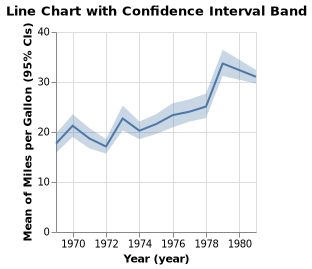

In [3]:
@vlplot(
  data = cars,  # Contains data and the x axix of chart
  x = "year(Year)",
  title = "Line Chart with Confidence Interval Band"
) +

@vlplot(
  mark = {:errorband, extent=:ci},  # First band containing the CI
  y = {"Miles_per_Gallon", title="Mean of Miles per Gallon (95% CIs)"}
) + 

@vlplot(
  mark = :line,  # Second band of a line plot of mean miles
  y = "mean(Miles_per_Gallon)"

)

In [4]:
# Import barley data

barley = dataset("barley") |> DataFrame;
first(barley, 4)

,yield,variety,year,site
,Float64,String,Int64,String
1,27.0,Manchuria,1931,University Farm
2,48.8667,Manchuria,1931,Waseca
3,27.4333,Manchuria,1931,Morris
4,39.9333,Manchuria,1931,Crookston


## Error Bar Plot

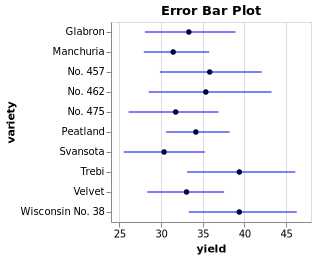

In [5]:
@vlplot(
  data = barley, # Load dataset
  y = "variety:n", # Axis common to both bands
  title = "Error Bar Plot"
) +

@vlplot(
  mark = {:point, filled = true, color = :black}, # Filled plack point
  x = {"mean(yield)", scale = {zero = false}}  # The mean of yield at each variety
) +

@vlplot(
  mark  = {:errorbar, extent = :ci, color = :blue}, # Plot a blue error bar
  x = {"yield"}
)

In [6]:
# Upload population dataset
population = dataset("population") |> DataFrame;
first(population, 4)

,year,age,sex,people
,Int64,Int64,Int64,Int64
1,1850,0,1,1483789
2,1850,0,2,1450376
3,1850,5,1,1411067
4,1850,5,2,1359668


## Box Plot with Min/Max Whiskers

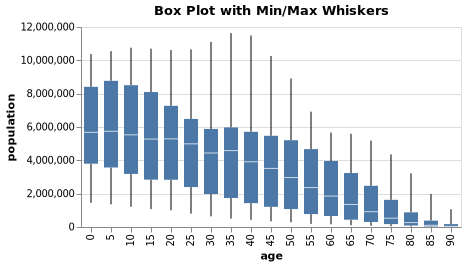

In [7]:
@vlplot(
  data = population,
  mark={:boxplot, extent="min-max"}, # The range is the min and max
  x = "age:o",
  y = {"people", title = "population"},
  title = "Box Plot with Min/Max Whiskers"
)

## Tukey Box Plot (1.5 IQR)

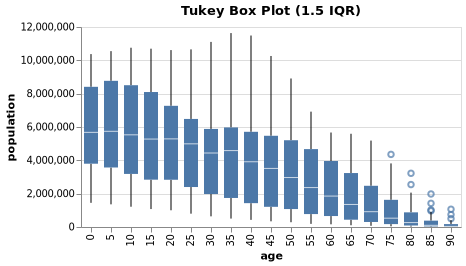

In [8]:
@vlplot(
  data = population,
  mark={:boxplot, extent="1.5"}, # The extent is 1.5sd
  x = "age:o",
  y = {"people", title = "population"},
  title = "Tukey Box Plot (1.5 IQR)"
)